In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [2]:
initCondi = [0, 0, 0]
N = 150

wl = np.linspace(.5, .5, N)
wr = np.linspace(1, 1, N)
t = np.linspace(0, 25, N)
r = 0.025
d = 0.145

In [3]:
phi_t = [initCondi[0]]

for i in range(len(t)-1):
    calka = phi_t[i] + np.trapz([(wr[i]-wl[i])*r/d, (wr[i+1]-wl[i+1])*r/d],[t[i], t[i+1]])
    phi_t.append(calka)

In [4]:
x_t = [initCondi[1]]

for i in range(len(t)-1):
    calka = x_t[i] + np.trapz([(wr[i]+wl[i])*r/2*np.cos(phi_t[i]), (wr[i+1]+wl[i+1])*r/2*np.cos(phi_t[i+1])],[t[i], t[i+1]])
    x_t.append(calka)

In [5]:
y_t = [initCondi[2]]

for i in range(len(t)-1):
    calka = y_t[i] + np.trapz([(wr[i]+wl[i])*r/2*np.sin(phi_t[i]), (wr[i+1]+wl[i+1])*r/2*np.sin(phi_t[i+1])],[t[i], t[i+1]])
    y_t.append(calka)

In [6]:
a = 0
b = -0.0725
Pxr = []
Pyr = []

for i in range(len(t)):
    newPx = x_t[i] + np.cos(phi_t[i])*a + (-1)*np.sin(phi_t[i])*b
    Pxr.append(newPx)
    newPy = y_t[i] + np.sin(phi_t[i])*a + np.cos(phi_t[i])*b
    Pyr.append(newPy)

In [7]:
a = 0
b = 0.0725
Pxl = []
Pyl = []

for i in range(len(t)):
    newPx = x_t[i] + np.cos(phi_t[i])*a + (-1)*np.sin(phi_t[i])*b
    Pxl.append(newPx)
    newPy = y_t[i] + np.sin(phi_t[i])*a + np.cos(phi_t[i])*b
    Pyl.append(newPy)

In [8]:
def CircleRadius(w1, w2, d):
    R = (w1+w2)/(w1 - w2)*d/2
    return R

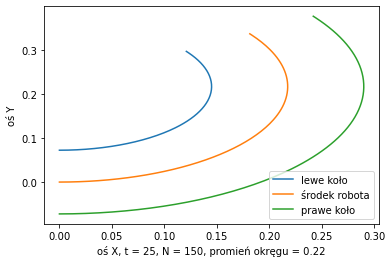

In [9]:
R = CircleRadius(wr[0], wl[0], d)

plt.plot(Pxl,Pyl, label="lewe koło")
plt.plot(x_t, y_t, label="środek robota")
plt.plot(Pxr,Pyr, label="prawe koło")
plt.xlabel("oś X, t = 25, N = 150, promień okręgu = %.2f" %R)
plt.ylabel("oś Y")
plt.legend(loc=4)
plt.savefig("4.pdf", format='pdf')